# Preliminary list of data-sets:


In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter


In [162]:
fetal = pd.read_csv('/content/fetal_health.csv')

In [163]:
fetal['fetal_health'] = fetal['fetal_health'].astype(int)

In [164]:
df = fetal

#### Renaming variables to shorten them

In [165]:
new_column_names = {
    'baseline value': 'baseline_val',
    'accelerations': 'accelerations',
    'fetal_movement': 'fetal_mov',
    'uterine_contractions': 'uterine_contractions',
    'light_decelerations': 'light_decelerations',
    'severe_decelerations': 'severe_decelerations',
    'prolongued_decelerations': 'prolong_decelerations',
    'abnormal_short_term_variability': 'abnorm_short_var',
    'mean_value_of_short_term_variability': 'mean_short_var',
    'percentage_of_time_with_abnormal_long_term_variability': 'perc_time_abnorm_long_var',
    'mean_value_of_long_term_variability': 'mean_long_var',
    'histogram_width': 'hist_width',
    'histogram_min': 'hist_min',
    'histogram_max': 'hist_max',
    'histogram_number_of_peaks': 'hist_peaks',
    'histogram_number_of_zeroes': 'hist_zeroes',
    'histogram_mode': 'hist_mode',
    'histogram_mean': 'hist_mean',
    'histogram_median': 'hist_median',
    'histogram_variance': 'hist_var',
    'histogram_tendency': 'hist_tendency',
    'fetal_health': 'fetal_health'
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)


In [166]:
corr = df.corr(method='pearson')

corr

,baseline_val,accelerations,fetal_mov,uterine_contractions,light_decelerations,severe_decelerations,prolong_decelerations,abnorm_short_var,mean_short_var,perc_time_abnorm_long_var,...,hist_min,hist_max,hist_peaks,hist_zeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
baseline_val,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_mov,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolong_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnorm_short_var,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_short_var,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
perc_time_abnorm_long_var,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


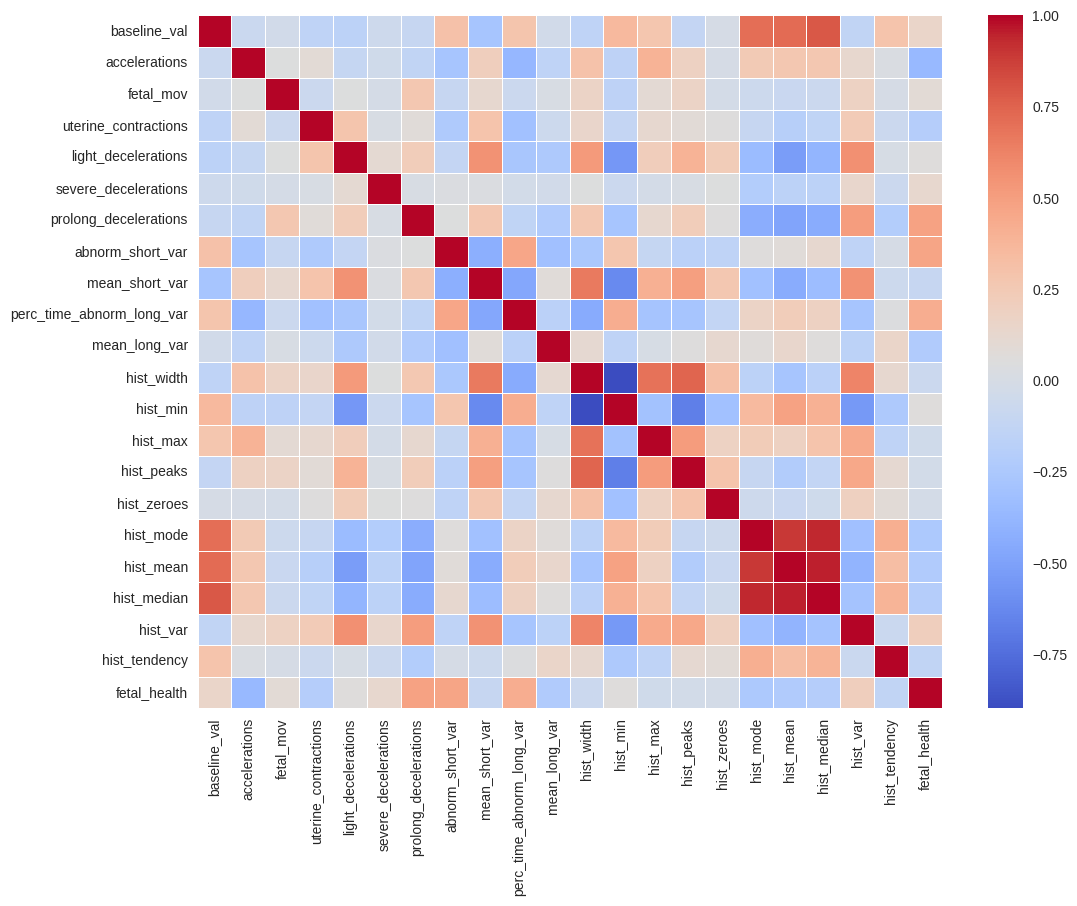

In [167]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Generate a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=.5)

# Show the plot
plt.show()


In [168]:
df = df.drop([ 'hist_mode','hist_median', 'hist_width','baseline_val'], axis=1)


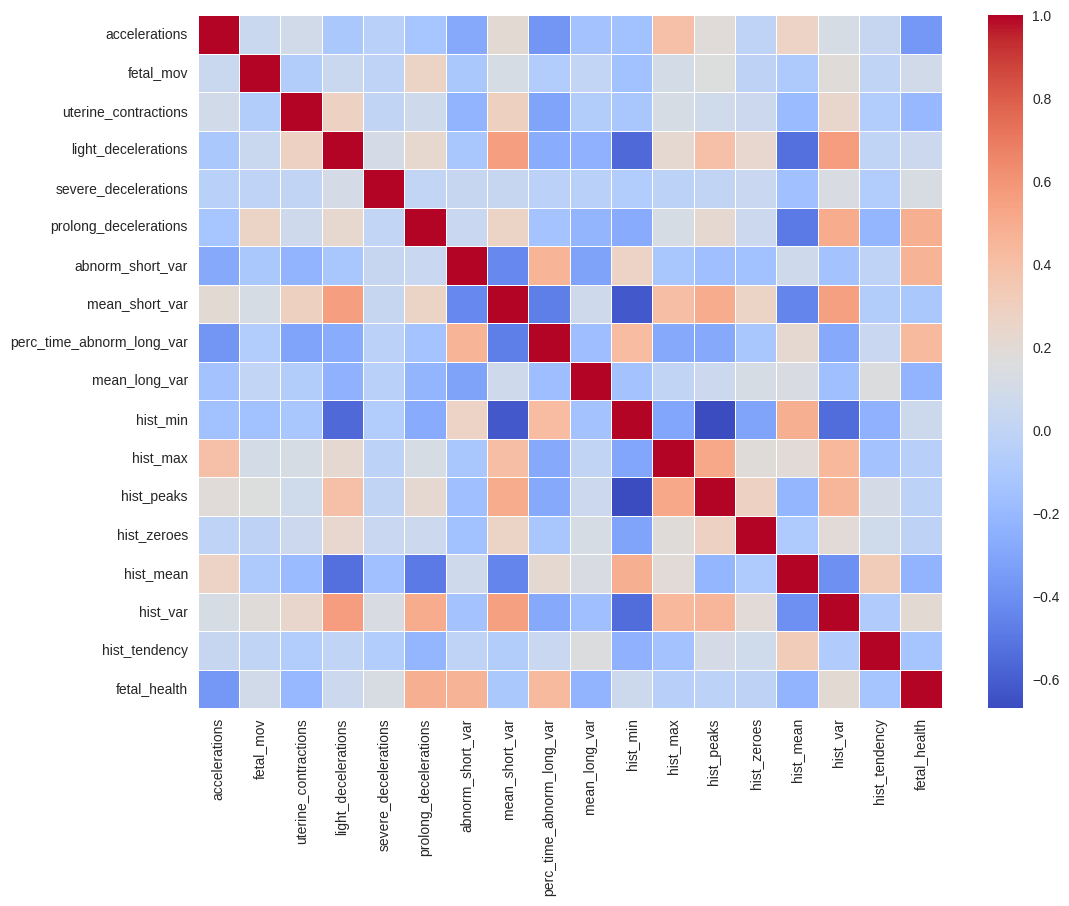

In [169]:
# New correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=.5)
plt.show()


### Pichart

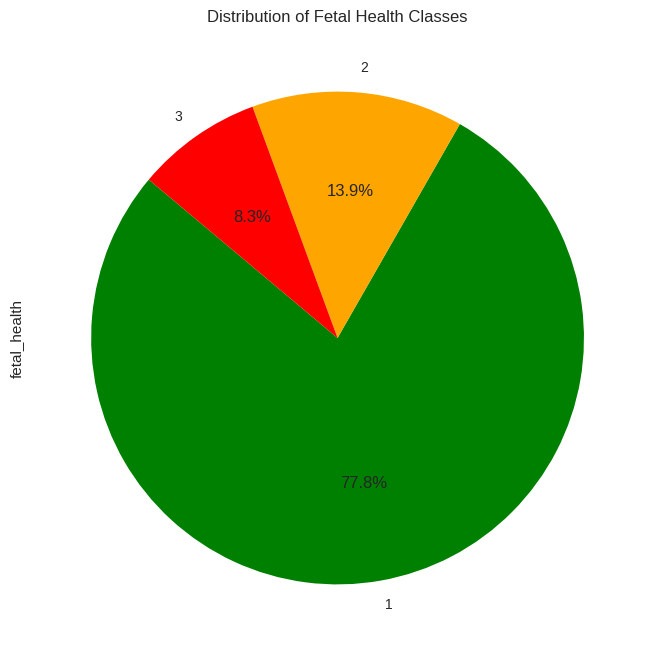

In [170]:
# Get the value counts of the 'fetal_health' column
class_counts = df['fetal_health'].value_counts()

# Specify colors: assuming class 1 is 'Normal', class 3 is 'Pathological'
colors = ['green', 'orange', 'red']  # Adjust according to your class order

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Fetal Health Classes')
plt.ylabel('fetal_health')
plt.show()

In [171]:
fetal.describe()

,baseline_val,accelerations,fetal_mov,uterine_contractions,light_decelerations,severe_decelerations,prolong_decelerations,abnorm_short_var,mean_short_var,perc_time_abnorm_long_var,...,hist_min,hist_max,hist_peaks,hist_zeroes,hist_mode,hist_mean,hist_median,hist_var,hist_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


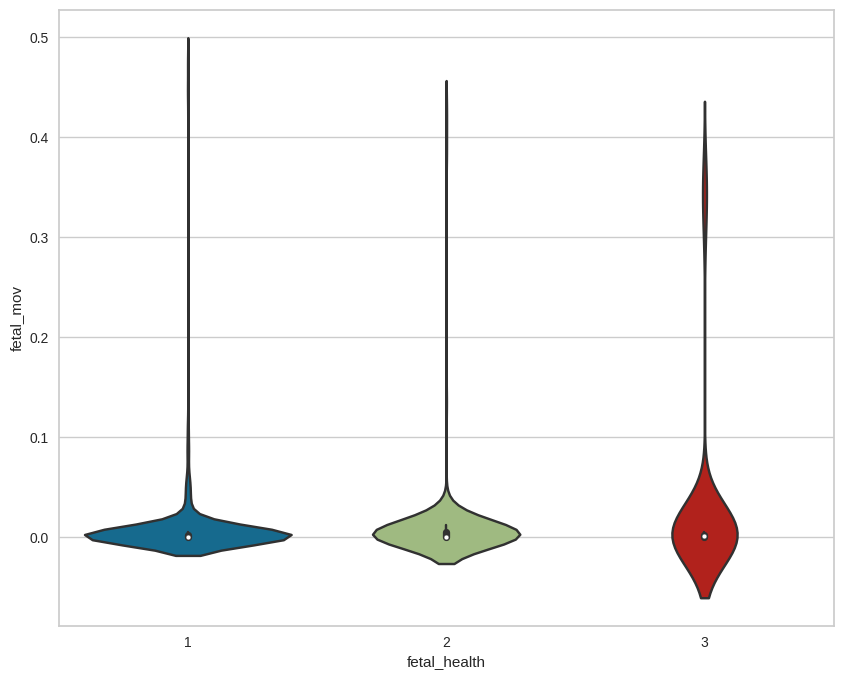

In [172]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="fetal_health", y="fetal_mov", data=fetal)

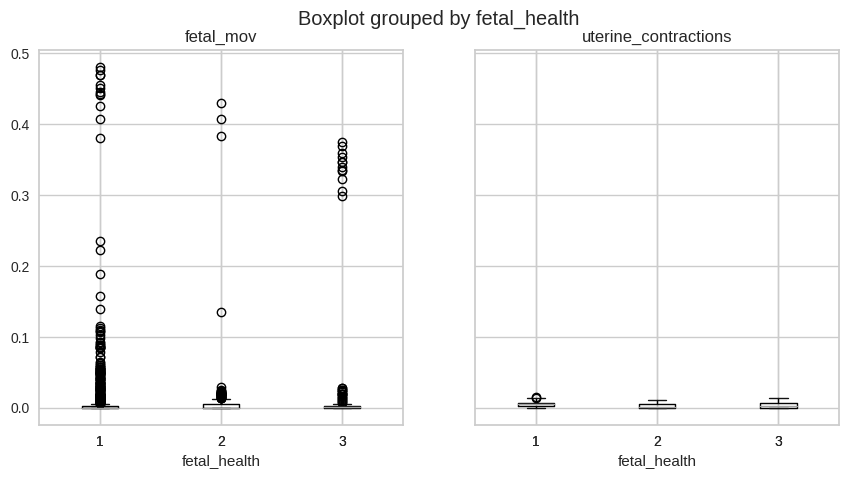

In [173]:
boxplot = fetal.boxplot(column=['fetal_mov', 'uterine_contractions'], by = 'fetal_health', figsize=(10,5))


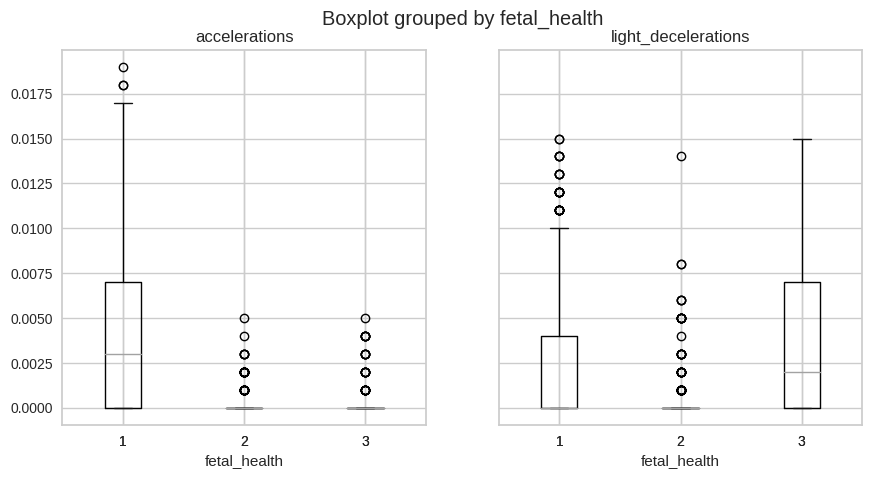

In [174]:
boxplot = fetal.boxplot(column=['accelerations','light_decelerations'], by = 'fetal_health', figsize=(10,5))


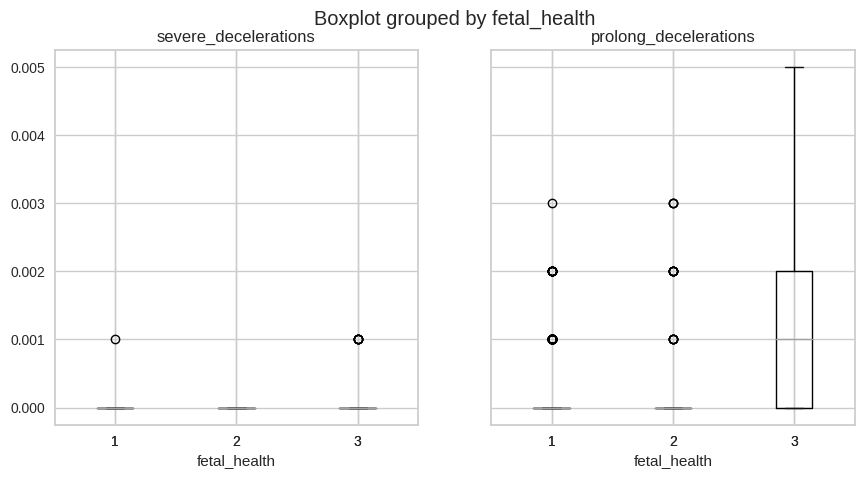

In [175]:
boxplot = fetal.boxplot(column=['severe_decelerations','prolong_decelerations'],by = 'fetal_health', figsize=(10,5))


# Check for missing values:

In [176]:
df.isnull().sum()

accelerations                0
fetal_mov                    0
uterine_contractions         0
light_decelerations          0
severe_decelerations         0
prolong_decelerations        0
abnorm_short_var             0
mean_short_var               0
perc_time_abnorm_long_var    0
mean_long_var                0
hist_min                     0
hist_max                     0
hist_peaks                   0
hist_zeroes                  0
hist_mean                    0
hist_var                     0
hist_tendency                0
fetal_health                 0
dtype: int64


### The modelling techniques to use:

Random Forest

KNN

Desicion Tree

Linear Regression

Logistic Regression

Voting Classifier

## Random Sampling

In [177]:
df['fetal_health'].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

In [178]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [179]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the test dataset is 426
The training dataset has 1322 records for the majority class and 231 records for the minority class.


In [180]:
y_test.value_counts()

1    333
2     64
3     29
Name: fetal_health, dtype: int64

Model: Random Forest
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       333
           2       0.90      0.83      0.86        64
           3       0.93      0.93      0.93        29

    accuracy                           0.96       426
   macro avg       0.93      0.91      0.92       426
weighted avg       0.95      0.96      0.95       426



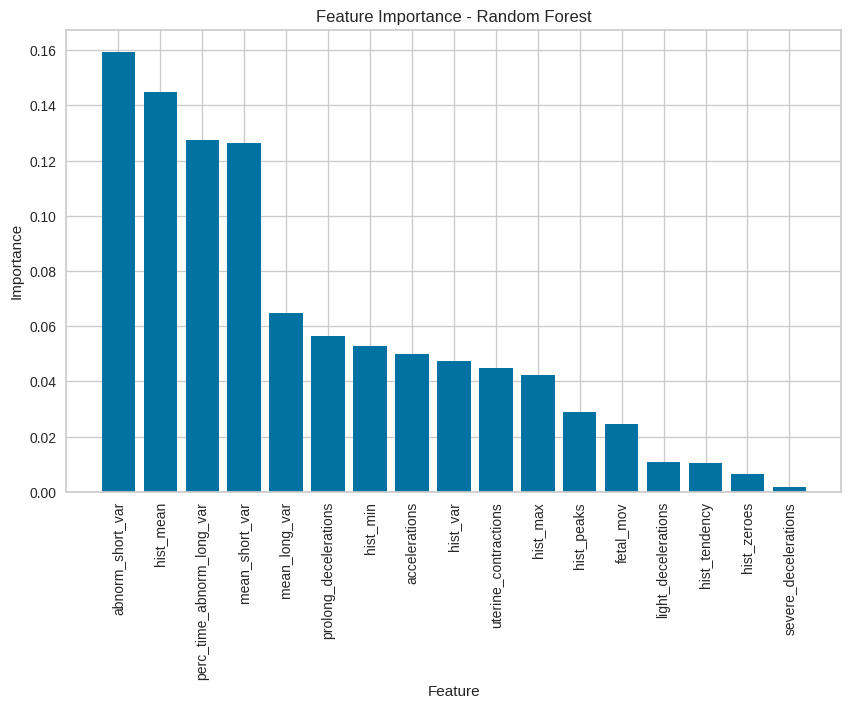

----------------------------------------
Model: KNN
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.93      0.92       333
           2       0.66      0.61      0.63        64
           3       0.73      0.66      0.69        29

    accuracy                           0.87       426
   macro avg       0.77      0.73      0.75       426
weighted avg       0.86      0.87      0.86       426

----------------------------------------
Model: Decision Tree
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       333
           2       0.81      0.89      0.85        64
           3       0.93      0.93      0.93        29

    accuracy                           0.94       426
   macro avg       0.91      0.93      0.92       426
weighted avg       0.95      0.94      0.94       426



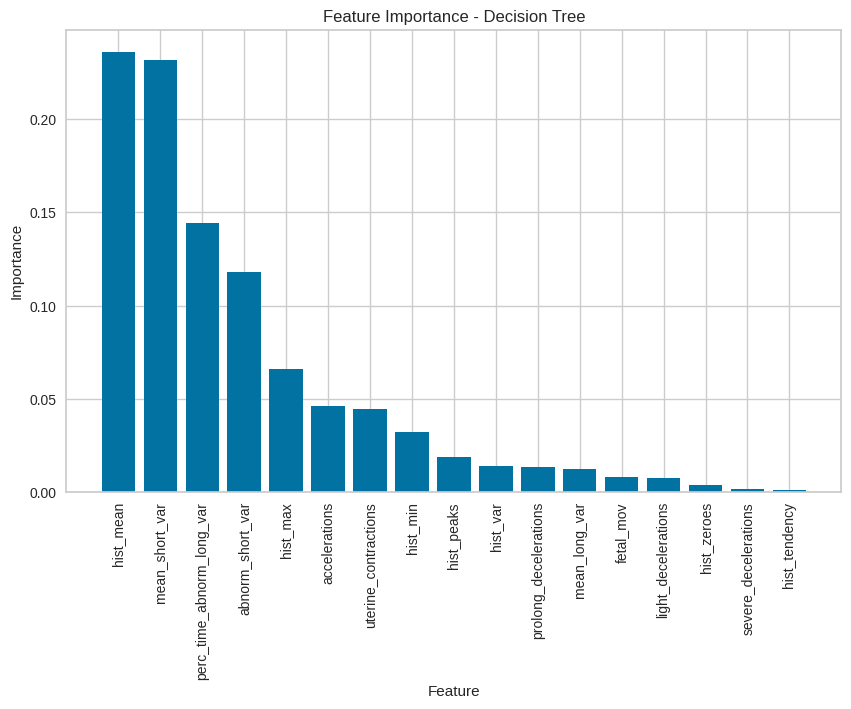

----------------------------------------
Model: Logistic Regression
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.93      0.92       333
           2       0.68      0.56      0.62        64
           3       0.54      0.66      0.59        29

    accuracy                           0.86       426
   macro avg       0.71      0.72      0.71       426
weighted avg       0.86      0.86      0.86       426

Feature Importance (Absolute Coefficients):
fetal_mov: -1.7537900955468093
mean_short_var: 0.7979541875343533
hist_tendency: -0.3969408164335315
hist_zeroes: -0.2518227116635284
accelerations: 0.19143918213022845
uterine_contractions: 0.1849299413541652
mean_long_var: -0.07793661832409751
abnorm_short_var: -0.07510959942934628
hist_mean: 0.04923868282618132
perc_time_abnorm_long_var: -0.042094077140241805
prolong_decelerations: -0.0346949808802918
hist_var: -0.03135940376686171
light_decelerations: 0.0177264

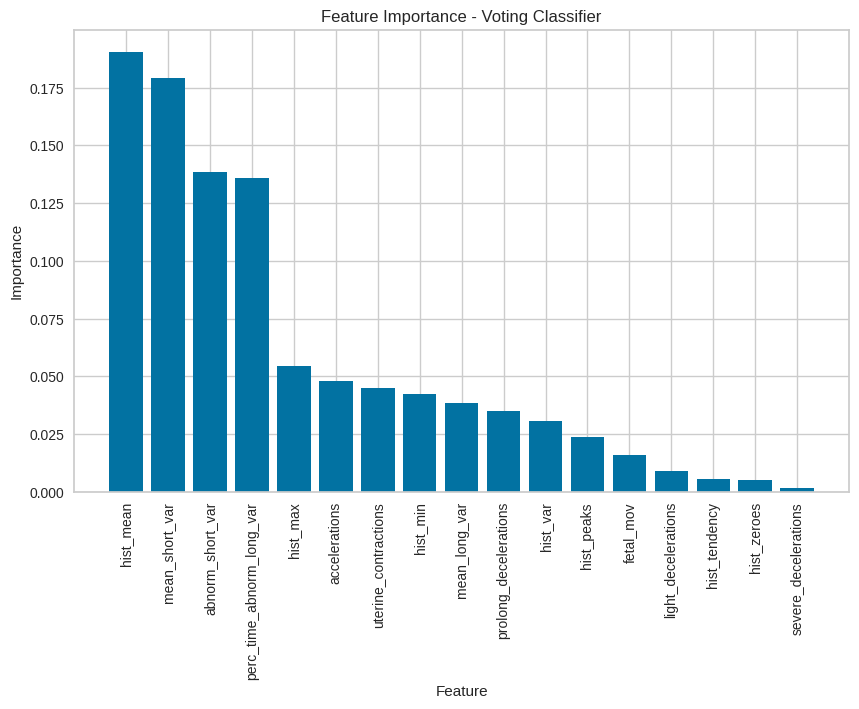

In [181]:
# Train machine learning models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
]

# Initialize a dictionary to store feature importances for each model
feature_importances = {}

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

    if name in ['Random Forest', 'Decision Tree']:
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)[::-1]

        feature_importances[name] = feature_importance
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance - {name}')
        plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
        plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.show()
    elif name == 'Logistic Regression':
        coef = model.coef_[0]
        sorted_idx = np.argsort(np.abs(coef))[::-1]
        print('Feature Importance (Absolute Coefficients):')
        for i in sorted_idx:
            print(f"{X.columns[i]}: {coef[i]}")

    print('-' * 40)

# Voting Classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting)

print('Voting Classifier')
print(f'Accuracy: {accuracy_voting:.2f}')
print('Classification Report:')
print(report_voting)

# Calculate feature importance for the Voting Classifier based on individual model importances
voting_feature_importance = np.mean([feature_importances[model_name] for model_name, _ in models if model_name in ['Random Forest', 'Decision Tree']], axis=0)

# Plot feature importance for the Voting Classifier
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Voting Classifier')
sorted_idx = np.argsort(voting_feature_importance)[::-1]
plt.bar(range(X.shape[1]), voting_feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()



# Undersampling


Model: Random Forest
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        41
           2       0.85      0.91      0.88        32
           3       0.97      0.91      0.94        33

    accuracy                           0.92       106
   macro avg       0.92      0.91      0.91       106
weighted avg       0.92      0.92      0.92       106



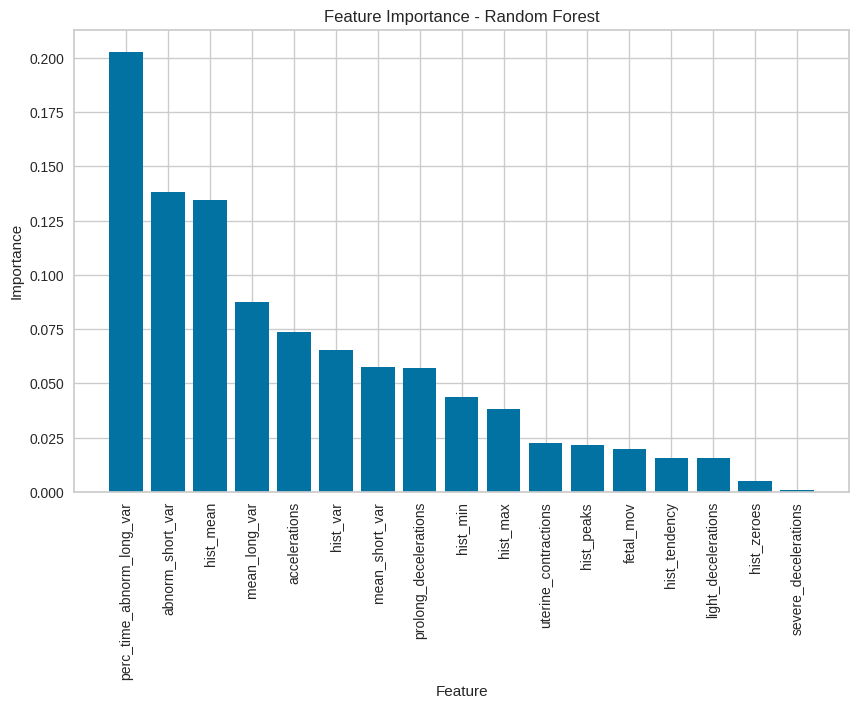

----------------------------------------
Model: KNN
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.76      0.81        41
           2       0.65      0.81      0.72        32
           3       0.83      0.76      0.79        33

    accuracy                           0.77       106
   macro avg       0.78      0.78      0.77       106
weighted avg       0.79      0.77      0.78       106

----------------------------------------
Model: Decision Tree
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.88      0.90        41
           2       0.76      0.91      0.83        32
           3       0.90      0.79      0.84        33

    accuracy                           0.86       106
   macro avg       0.86      0.86      0.86       106
weighted avg       0.87      0.86      0.86       106



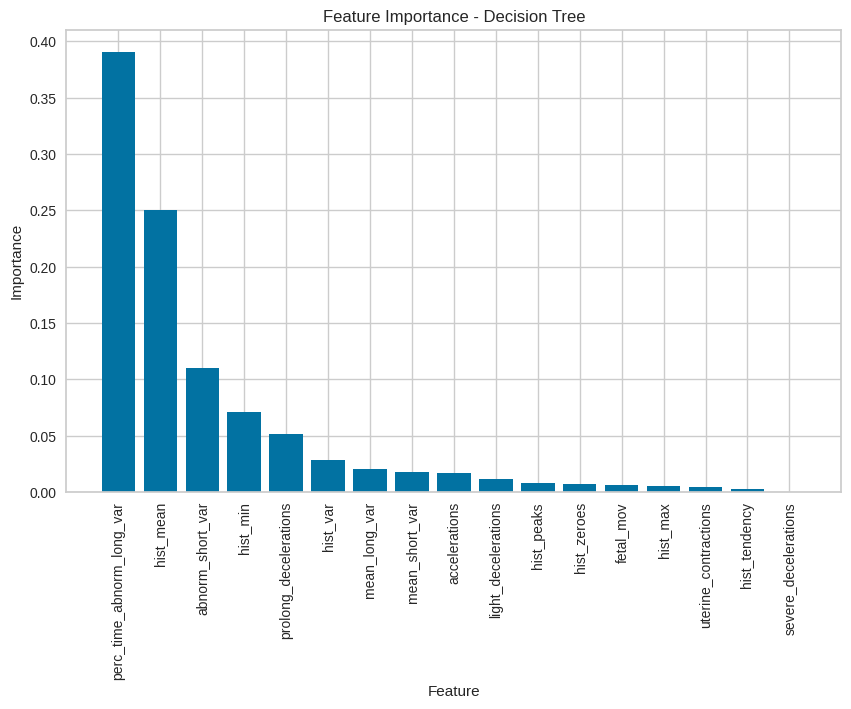

----------------------------------------
Model: Logistic Regression
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        41
           2       0.72      0.72      0.72        32
           3       0.79      0.79      0.79        33

    accuracy                           0.79       106
   macro avg       0.79      0.79      0.79       106
weighted avg       0.79      0.79      0.79       106

Feature Importance (Absolute Coefficients):
fetal_mov: -0.8243201812006256
hist_tendency: 0.10196710618571223
hist_zeroes: -0.09863103088065538
accelerations: 0.07730751508663981
mean_short_var: 0.06696049808390375
perc_time_abnorm_long_var: -0.059746818046621276
abnorm_short_var: -0.05284954611093654
uterine_contractions: 0.041704630162611785
hist_mean: 0.029860746243369384
hist_var: -0.0297753920880626
mean_long_var: -0.025924501766558344
hist_peaks: -0.015673683413423917
prolong_decelerations: -0.01322782

In [182]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the undersampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train machine learning models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

    if name in ['Random Forest', 'Decision Tree']:
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)[::-1]

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance - {name}')
        plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
        plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.show()
    elif name == 'Logistic Regression':
        coef = model.coef_[0]
        sorted_idx = np.argsort(np.abs(coef))[::-1]
        print('Feature Importance (Absolute Coefficients):')
        for i in sorted_idx:
            print(f"{X.columns[i]}: {coef[i]}")

    print('-' * 40)

#Voting Classifier
voting_clf = VotingClassifier(estimators=models, voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting)

print('Voting Classifier')
print(f'Accuracy: {accuracy_voting:.2f}')
print('Classification Report:')
print(report_voting)


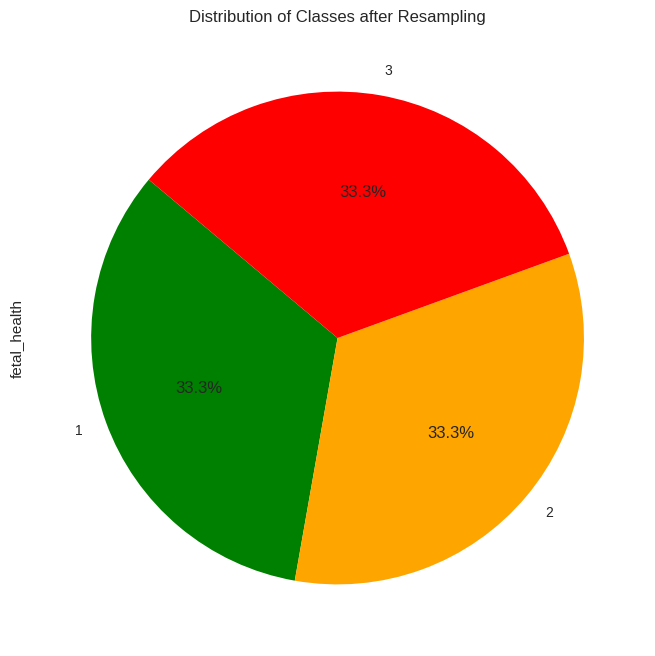

In [183]:
# Get the value counts of the 'fetal_health' column
class_counts = y_resampled.value_counts()

# Specify colors: assuming class 1 is 'Normal', class 3 is 'Pathological'
colors = ['green', 'orange', 'red']  # Adjust according to your class order

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Classes after Resampling')
plt.ylabel('fetal_health')
plt.show()

# OverSampling

Model: Random Forest
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.95      0.97       353
           2       0.95      0.99      0.97       317
           3       0.99      1.00      1.00       323

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



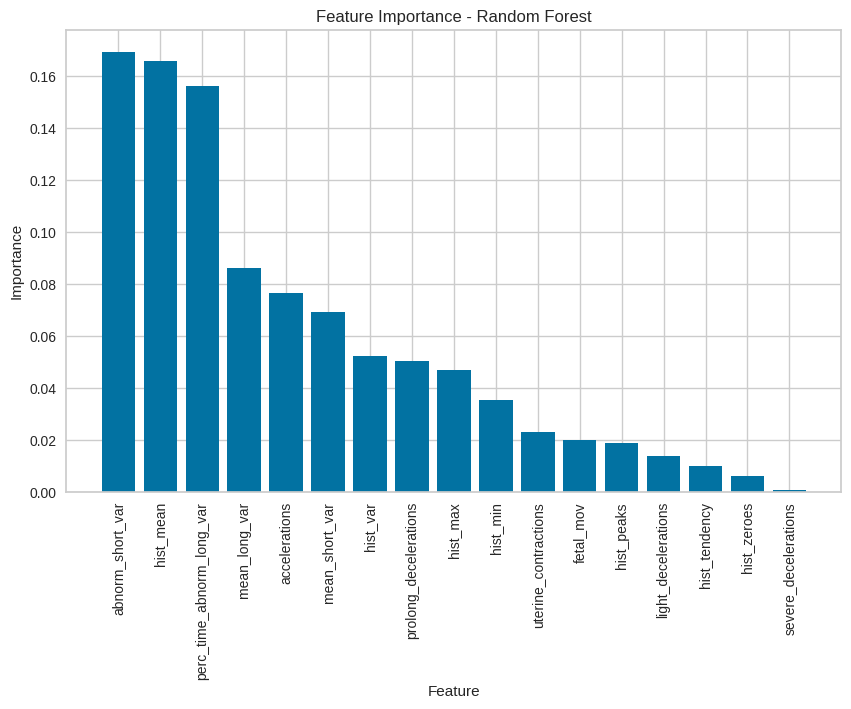

----------------------------------------
Model: KNN
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.82      0.89       353
           2       0.84      0.97      0.90       317
           3       0.98      1.00      0.99       323

    accuracy                           0.93       993
   macro avg       0.93      0.93      0.93       993
weighted avg       0.93      0.93      0.93       993

----------------------------------------
Model: Decision Tree
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.95      0.97       353
           2       0.95      1.00      0.98       317
           3       0.99      1.00      0.99       323

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



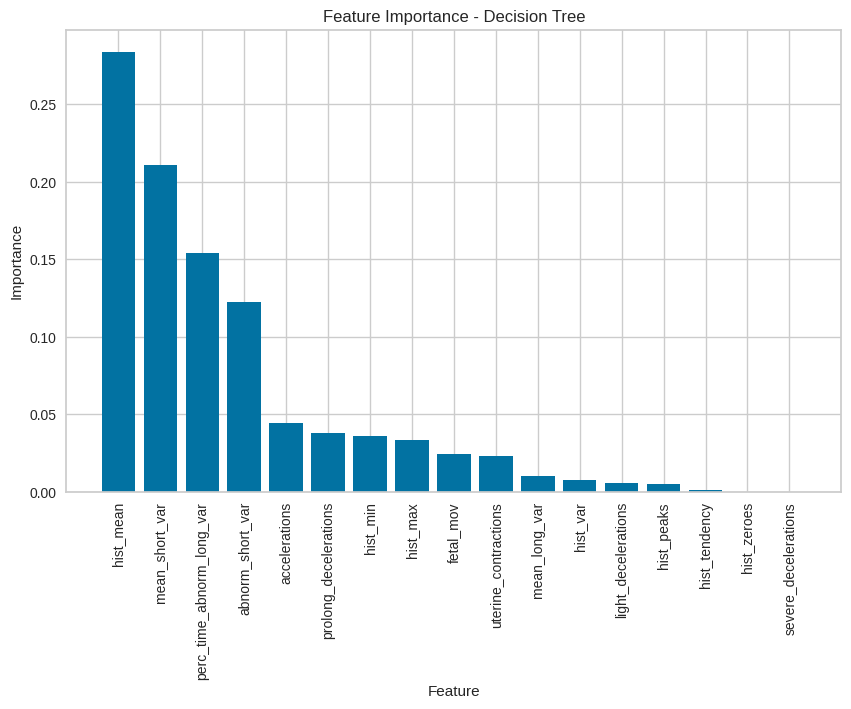

----------------------------------------
Model: Logistic Regression
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.79      0.82       353
           2       0.71      0.75      0.73       317
           3       0.84      0.85      0.85       323

    accuracy                           0.80       993
   macro avg       0.80      0.80      0.80       993
weighted avg       0.80      0.80      0.80       993

Feature Importance (Absolute Coefficients):
fetal_mov: -2.2613402841015082
hist_zeroes: -0.47537035896088453
mean_short_var: 0.26363861861135646
accelerations: 0.2315784681276818
hist_tendency: -0.18276489199083606
uterine_contractions: 0.14768433678367376
abnorm_short_var: -0.06738392268705225
perc_time_abnorm_long_var: -0.048260738095970056
mean_long_var: -0.04506266790139206
hist_peaks: 0.04487253340443923
prolong_decelerations: -0.04422011508142026
hist_mean: 0.03446574575073921
hist_var: -0.030530021734

In [184]:
# Perform oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the oversampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(report)

    if name in ['Random Forest', 'Decision Tree']:
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)[::-1]

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance - {name}')
        plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
        plt.xticks(range(X.shape[1]), [X.columns[i] for i in sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.show()
    elif name == 'Logistic Regression':
        coef = model.coef_[0]
        sorted_idx = np.argsort(np.abs(coef))[::-1]
        print('Feature Importance (Absolute Coefficients):')
        for i in sorted_idx:
            print(f"{X.columns[i]}: {coef[i]}")

    print('-' * 40)

# Voting Classifier
voting_clf = VotingClassifier(estimators=models, voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting)

print('Voting Classifier')
print(f'Accuracy: {accuracy_voting:.2f}')
print('Classification Report:')
print(report_voting)